# Introduction to Regression with Neural Networks in TensorFlow

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to view and fit

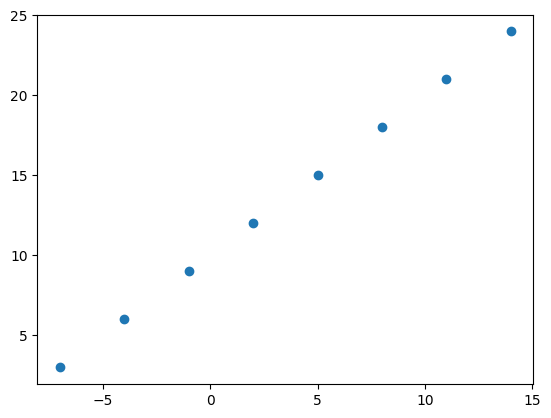

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y);

## Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[0].ndim

0

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling in TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [ ]:
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=5)


Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 16.9649 - mae: 16.9649
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 16.6837 - mae: 16.6837
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 16.4024 - mae: 16.4024
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 16.1212 - mae: 16.1212
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 15.8399 - mae: 15.8399


In [ ]:
X.dtype

tf.float32

In [ ]:
# Check out X, Y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 87ms/step


array([[-9.148402]], dtype=float32)

## Improving the model

1. **Creating a model** - we might add more layers, increase the number of hidden untis (neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the learning rate of the optimization function.
3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longer) or on more date (give the model more examples to learn from)

In [ ]:
# Let's rebuild our model

# Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 362ms/step - loss: 20.1627 - mae: 20.1627
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 19.8814 - mae: 19.8814
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 19.6002 - mae: 19.6002
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 19.3189 - mae: 19.3189
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 19.0377 - mae: 19.0377
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 18.7564 - mae: 18.7564
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 18.4752 - mae: 18.4752
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 18.1939 - mae: 18.1939
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 17.9127 - mae: 17.9127
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 17.6314 - mae: 17.6314
Epoch 11/100
1/1 [==============================] - 

In [ ]:
# Reminder
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 50ms/step


array([[29.252047]], dtype=float32)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.3405 - mae: 14.3405
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.6143 - mae: 13.6143
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.8876 - mae: 12.8876
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 12.1595 - mae: 12.1595
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 11.4291 - mae: 11.4291
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.6943 - mae: 10.6943
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 9.9532 - mae: 9.9532
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 9.2036 - mae: 9.2036
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 8.4435 - mae: 8.4435
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.6706 - mae: 7.6706
Epoch 11/100
1/1 [==============================] - 0s 11ms

In [ ]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 63ms/step


array([[25.519955]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go trough when building neural networks is:
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it > evaluate it...
```

When it comes to evaluation...
> "VISUALIZE!"

It's a good idea to visualize:
* The data - what it looks like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the modle - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

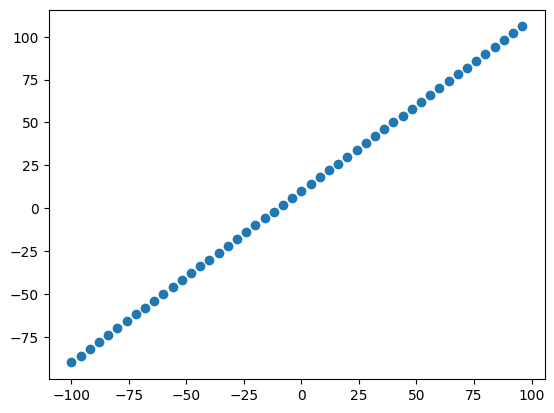

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets...

* **Training set** - 70/80%
* **Validation** - 10/15%
* **Test set** - 10/15%

In [ ]:
len(X)

50

In [ ]:
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

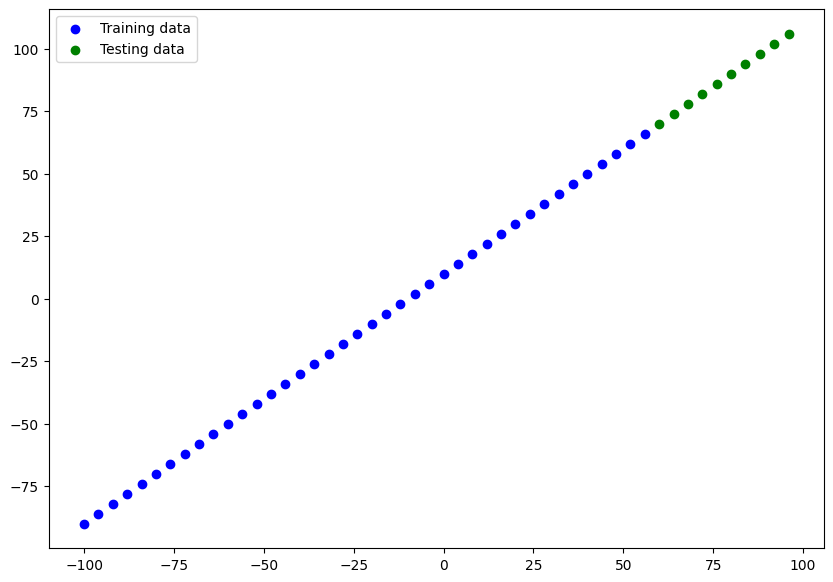

In [ ]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend()

In [ ]:
#Let's have a look at how to build a neural network for our data

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#model.fit(X_train, y_train, epochs=100 )

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
# Creating a model which builds automatically by defining the input shape
tf.random.set_seed(42)

# Creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# Compiling
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns)
* Non-trainable params - these are not updated during training (when you bring ready parameters)

In [ ]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=30, verbose=0)

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


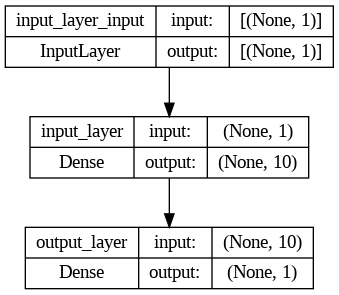

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize, plot them against the ground truth labels.

`y_test` / `y_true` versus `y_pred`


In [ ]:
y_pred = model.predict(X_test)
y_pred
#y_test

1/1 [==============================] - 0s 43ms/step


array([[55.182735],
       [58.807476],
       [62.43221 ],
       [66.05694 ],
       [69.68167 ],
       [73.30641 ],
       [76.93114 ],
       [80.55588 ],
       [84.1806  ],
       [87.80534 ]], dtype=float32)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10,7))
  # Plot training data
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot predictions
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();


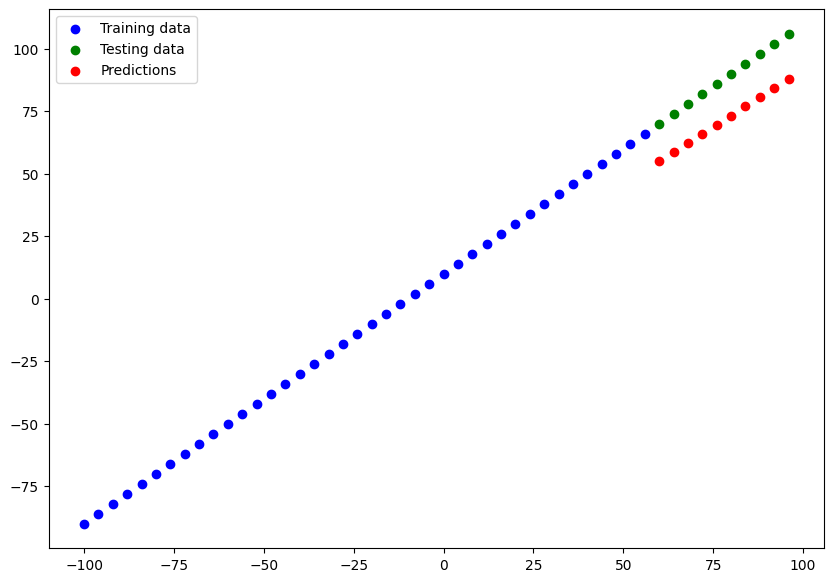

In [ ]:
plot_predictions()

In [ ]:
y_train, X_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>)

In [ ]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem, we use different evaluation metrics.

Regression:
* MAE
* MSE
* Huber - less sensitive to errors than MSE

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 271ms/step - loss: 16.5060 - mae: 16.5060


[16.50596046447754, 16.50596046447754]

In [ ]:
y_pred.reshape([10,])

array([55.182735, 58.807476, 62.43221 , 66.05694 , 69.68167 , 73.30641 ,
       76.93114 , 80.55588 , 84.1806  , 87.80534 ], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# MAE
tf.metrics.mean_absolute_error(y_test, tf.squeeze(tf.constant(y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=16.50596>

In [ ]:
# MSE
tf.metrics.mean_squared_error(y_test, tf.squeeze(tf.constant(y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=273.60852>

## Running experiments to improve our model

1. Get more data
2. Larger model (more complex)
3. Train for longer

3 experiments:
1. `model1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model2` - 2 layers, trained for 100 epochs.
3. `model3` - 2 layers, trained for 500 epochs.

**Build `model1`**

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"]
                )

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 1s 26ms/step - loss: 21.5509 - mae: 21.5509
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 9.8642 - mae: 9.8642
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 11.2959 - mae: 11.2959
Epoch 4/100
2/2 [==============================] - 0s 15ms/step - loss: 9.5479 - mae: 9.5479
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 10.4555 - mae: 10.4555
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 9.6827 - mae: 9.6827
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 8.7806 - mae: 8.7806
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 9.0567 - mae: 9.0567
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 19.2882 - mae: 19.2882
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 10.4088 - mae: 10.4088
Epoch 11/100
2/2 [==============================] - 0s 12ms

1/1 [==============================] - 0s 40ms/step


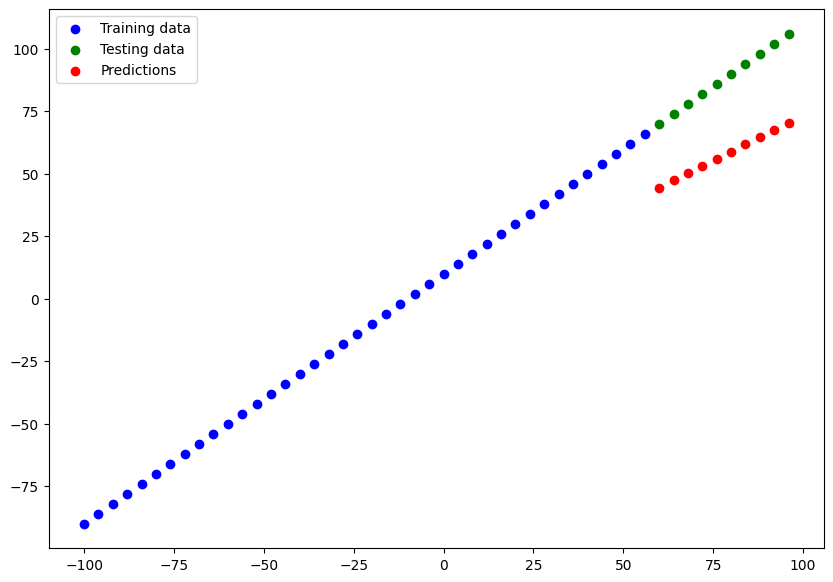

In [ ]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
y_preds_1

array([[44.458786],
       [47.334873],
       [50.21096 ],
       [53.087044],
       [55.96313 ],
       [58.839214],
       [61.7153  ],
       [64.591385],
       [67.46747 ],
       [70.34356 ]], dtype=float32)

In [ ]:
mae_1 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(tf.constant(y_preds_1)))
mse_1 = tf.metrics.mean_squared_error(y_test, tf.squeeze(tf.constant(y_preds_1)))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.598827>,
 <tf.Tensor: shape=(), dtype=float32, numpy=946.7096>)

**Build `model2`**

* 2 dense layers, trained for 100 epochs

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 45.1275 - mse: 3034.4507
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 25.6443 - mse: 882.3953
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 29.5817 - mse: 1327.8541
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 16.5921 - mse: 386.2256
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 19.1556 - mse: 527.0640
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 13.5904 - mse: 259.8863
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.7535 - mse: 219.8438
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1083 - mse: 154.3936
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 40.3421 - mse: 2561.1506
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 27.7530 - mse: 1084.8176
Epoch 11/100
2/2 [==========================

In [ ]:
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 23.3340 - mse: 797.5625
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 8.1548 - mse: 90.6512
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 18.0538 - mse: 476.7906
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 10.0377 - mse: 160.2287
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 12.4487 - mse: 195.4223
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.9136 - mse: 114.8143
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 10.9722 - mse: 169.5110
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.5745 - mse: 120.0292
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 38.9436 - mse: 2383.4897
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 25.8150 - mse: 935.1451
Epoch 11/100
2/2 [==============================] -

1/1 [==============================] - 0s 69ms/step


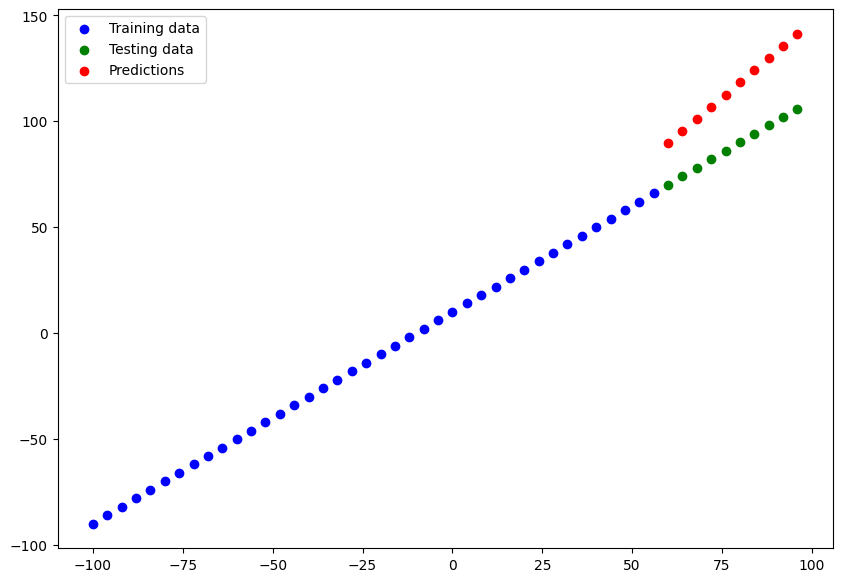

In [ ]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
y_preds_2

array([[ 89.58753 ],
       [ 95.33254 ],
       [101.07755 ],
       [106.822556],
       [112.56756 ],
       [118.31257 ],
       [124.05758 ],
       [129.8026  ],
       [135.54759 ],
       [141.2926  ]], dtype=float32)

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

In [ ]:
mae_2 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(tf.constant(y_preds_2)))
mse_2 = tf.metrics.mean_squared_error(y_test, tf.squeeze(tf.constant(y_preds_2)))

In [ ]:
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=27.44007>,
 <tf.Tensor: shape=(), dtype=float32, numpy=778.079>)

**Build `model3`**

* 2 layers, trained for 500 epochs

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 12ms/step - loss: 48.6160 - mae: 48.6160
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 35.5075 - mae: 35.5075
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 37.6396 - mae: 37.6396
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 14.5173 - mae: 14.5173
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 20.8437 - mae: 20.8437
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 8.2040 - mae: 8.2040
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 17.8131 - mae: 17.8131
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 17.5495 - mae: 17.5495
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 30.4963 - mae: 30.4963
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 12.5684 - mae: 12.5684
Epoch 11/500
2/2 [==============================] - 0s 7ms/s

1/1 [==============================] - 0s 93ms/step


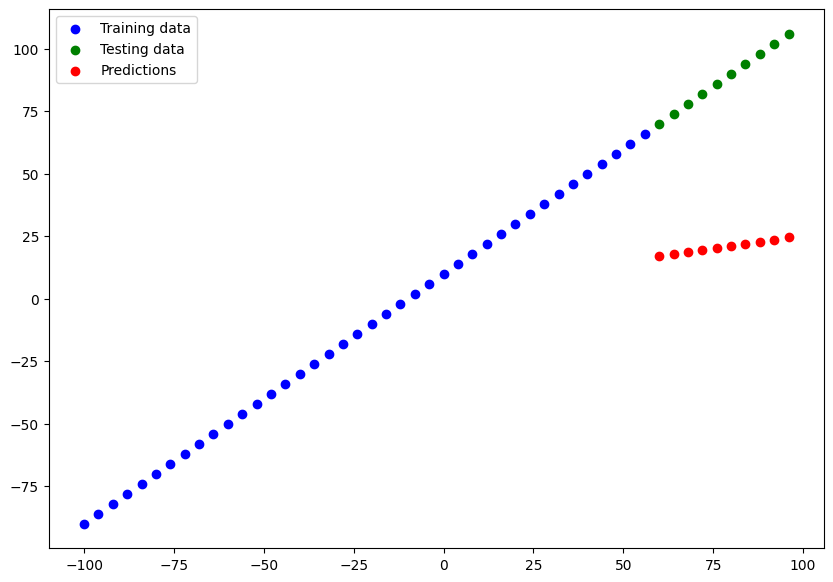

In [ ]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
mae_3 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(tf.constant(y_preds_3)))
mse_3 = tf.metrics.mean_squared_error(y_test, tf.squeeze(tf.constant(y_preds_3)))

###Comparing the results of our experiments

In [ ]:
# Pandas dataframe
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],["model_2", mae_2.numpy(), mse_2.numpy()],["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.598827,946.709595
1,model_2,27.440069,778.078979
2,model_3,67.219406,4601.083496


In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


###Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

**Resource:** As you build more models, you'll want to look into using:
* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard)

## Saving our models

There are 2 main formats:
1. The SaveModel Format
2. The HDF5 format


In [ ]:
model_2.save("model")


In [ ]:
model.save("model.h5")

##Loading in a saved model

In [ ]:
loaded_SavedModel_format = tf.keras.models.load_model("model")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 with the saved one
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 72ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Loading H5 format
h5_format = tf.keras.models.load_model("model.h5")
h5_format.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


##Downloading a model
**Using code**

In [ ]:
from google.colab import files
files.download("/content/model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##A larger example

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
# Import libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [ ]:
# ONE-HOT Encoding
pd.get_dummies(insurance)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
# Features and labels
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Spliting data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Building a model
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

insurance_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13297.3330 - mae: 13297.3330
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 12447.7188 - mae: 12447.7188
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12184.0469 - mae: 12184.0469
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12113.4023 - mae: 12113.4023
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 12007.9365 - mae: 12007.9365
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 11838.1230 - mae: 11838.1230
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 11542.1143 - mae: 11542.1143
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 11061.7441 - mae: 11061.7441
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 10451.0879 - mae: 10451.0879
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 9803.997

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8922.9502 - mae: 8922.9502


[8922.9501953125, 8922.9501953125]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

To improve:
1. more layers
2. longer training
3. own experiment

In [ ]:
# Building a model
tf.random.set_seed(42)

y_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

y_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        metrics=["mae"])

y_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [ ]:
y_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8627.8828 - mae: 8627.8828


[8627.8828125, 8627.8828125]

In [ ]:
# Building a model
tf.random.set_seed(42)

x_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

x_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                        metrics=["mae"])

history = x_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 11253.2588 - mae: 11253.2588
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 8477.5547 - mae: 8477.5547
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 8443.4473 - mae: 8443.4473
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 8356.3906 - mae: 8356.3906
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 8320.9814 - mae: 8320.9814
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 8385.0127 - mae: 8385.0127
Epoch 7/200
34/34 [==============================] - 0s 5ms/step - loss: 8376.6533 - mae: 8376.6533
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 8408.4746 - mae: 8408.4746
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 8369.2217 - mae: 8369.2217
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 8468.4893 - mae: 8468.48

In [ ]:
x_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8802.1611 - mae: 8802.1611


[8802.1611328125, 8802.1611328125]

In [ ]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [ ]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

Text(0.5, 0, 'epochs')

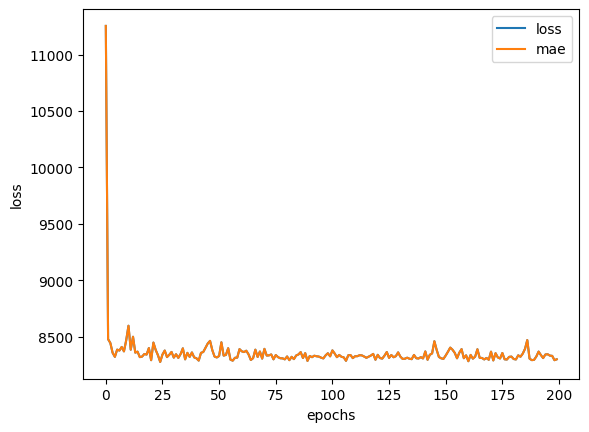

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [77]:
from sklearn.model_selection import train_test_split
import pandas as pd
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_one_hot = pd.get_dummies(insurance)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [5]:
len(y_test)

268

In [20]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model1.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

history = model1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [12]:
y_train.median()

9575.4421

In [21]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 11, 10)            20        
                                                                 
 dense_13 (Dense)            (None, 11, 1)             11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [22]:
model1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 8922.8340 - mae: 8922.8340


[8922.833984375, 8922.833984375]

In [78]:
tf.random.set_seed(42)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

insurance_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_0.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=["mae"])

history = insurance_model_0.fit(X_train, y_train, epochs=200, callbacks=[callback], verbose=0)

In [79]:
insurance_model_0.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3616.6045 - mae: 3616.6045


[3616.6044921875, 3616.6044921875]

Text(0.5, 0, 'epochs')

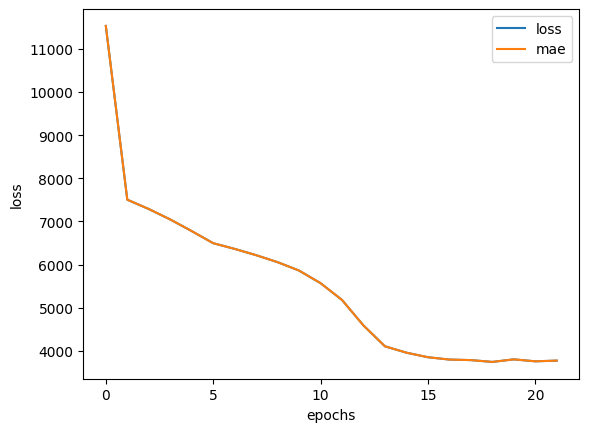

In [80]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [81]:
insurance_model_0.evaluate(X_train, y_train)

34/34 [==============================] - 0s 2ms/step - loss: 3782.7996 - mae: 3782.7996


[3782.799560546875, 3782.799560546875]

##Preprocessing data (normalization and standardization)

Neural networks tend to prefer normalization!

<Axes: ylabel='Frequency'>

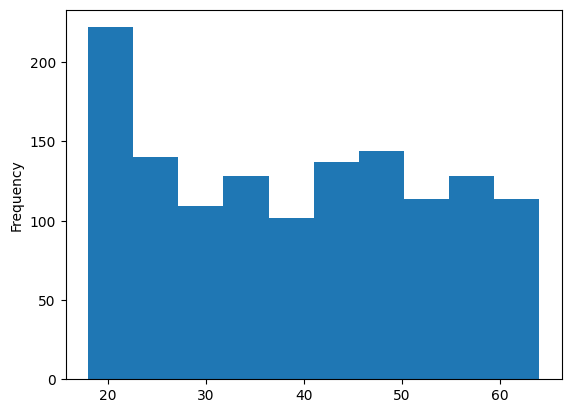

In [45]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

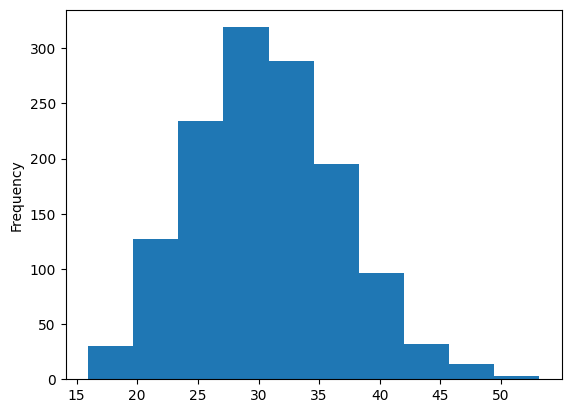

In [46]:
X["bmi"].plot(kind="hist")

In [47]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<Axes: ylabel='Frequency'>

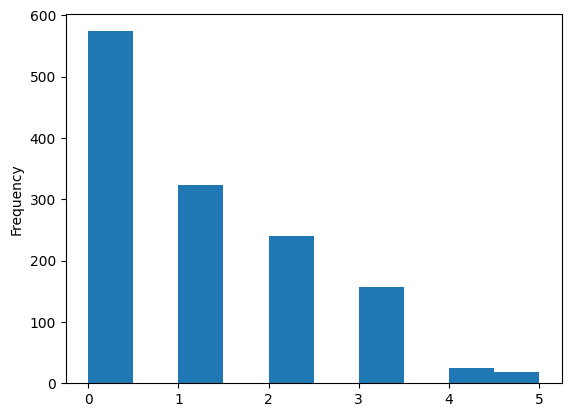

In [48]:
X["children"].plot(kind="hist")

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [83]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(),["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [84]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [85]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [86]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [87]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [91]:
tf.random.set_seed(42)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

insurance_model_final = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_final.compile(loss=tf.keras.losses.mae,
                              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                              metrics=["mae"])

history = insurance_model_final.fit(X_train_normal, y_train, epochs=200, callbacks=[callback], verbose=0)

In [92]:
insurance_model_final.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3155.1335 - mae: 3155.1335


[3155.133544921875, 3155.133544921875]

In [93]:
insurance_model_final.evaluate(X_train_normal, y_train)

34/34 [==============================] - 0s 2ms/step - loss: 3473.2854 - mae: 3473.2854


[3473.285400390625, 3473.285400390625]

Text(0, 0.5, 'loss')

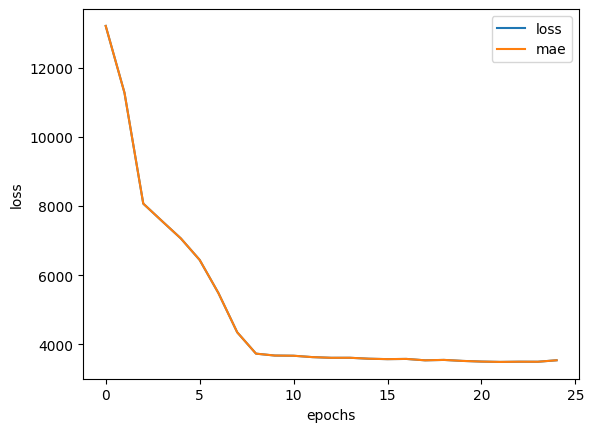

In [94]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

In [95]:
insurance_model_final.predict(X_test_normal)

9/9 [==============================] - 0s 4ms/step


array([[ 9348.244  ],
       [ 5984.884  ],
       [44613.547  ],
       [ 9314.342  ],
       [32490.516  ],
       [ 5694.845  ],
       [ 1100.9603 ],
       [13403.619  ],
       [ 3587.7576 ],
       [10255.117  ],
       [35928.027  ],
       [ 7792.2397 ],
       [ 4140.1016 ],
       [41069.58   ],
       [43433.984  ],
       [40740.312  ],
       [10522.371  ],
       [40606.24   ],
       [ 8583.627  ],
       [39031.86   ],
       [ 4093.7134 ],
       [ 8014.5234 ],
       [  670.2754 ],
       [ 3089.238  ],
       [10900.59   ],
       [11247.75   ],
       [12204.126  ],
       [ 4898.3267 ],
       [ 9949.217  ],
       [  406.67868],
       [ 8321.957  ],
       [11654.455  ],
       [ 1841.7959 ],
       [ 5186.904  ],
       [ 2940.392  ],
       [ 8795.082  ],
       [ 1843.5677 ],
       [ 7861.462  ],
       [41718.906  ],
       [37205.438  ],
       [ 3135.2188 ],
       [ 2350.1162 ],
       [11604.061  ],
       [11468.703  ],
       [ 5524.8076 ],
       [11

In [105]:
y_test.size

268

In [106]:
x_test = list(range(0, 268))

9/9 [==============================] - 0s 2ms/step


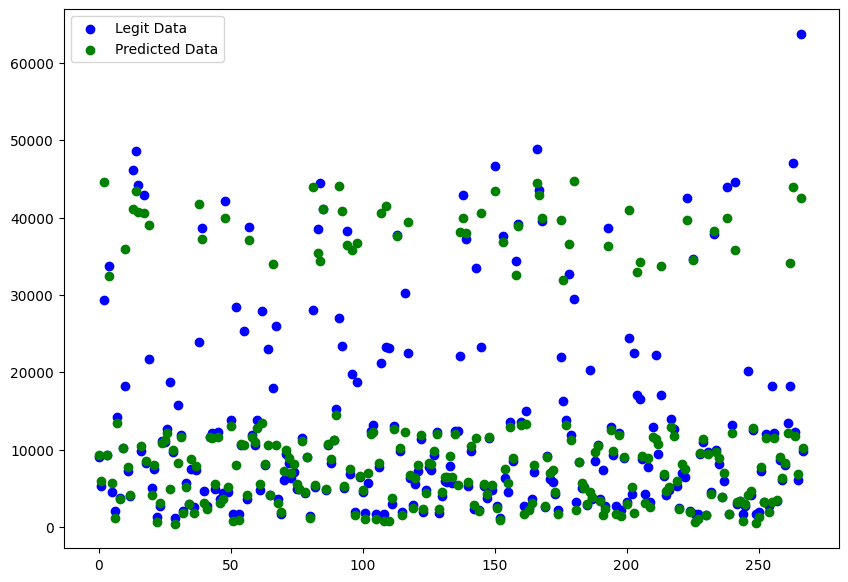

In [107]:
predictions = insurance_model_final.predict(X_test_normal)

plt.figure(figsize=(10,7))
plt.scatter(x_test, y_test, c="b", label="Legit Data")
plt.scatter(x_test, tf.squeeze(predictions), c="g", label="Predicted Data")

plt.legend();